
# Data Cleaning and Wrangling



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
path = '/content/drive/MyDrive/Data/Online payments.csv'
payments = pd.read_csv(path)
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
payments.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Checking the values in the step column
payments['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [7]:
payments['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
payments['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
# Dropping columns 
payments.drop(columns=['nameDest', 'nameOrig'], inplace=True)

In [10]:
# Renaming columns
payments.rename(columns={'oldbalanceOrg':'old_balance_orig', 
                         'newbalanceOrig':'new_balance_orig', 
                         'oldbalanceDest':'old_balance_dest',
                         'newbalanceDest':'new_balance_dest',
                         'isFraud':'is_fraud',
                         'isFlaggedFraud':'is_flagged_fraud'}, inplace=True)

In [11]:
payments['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
payment_type = payments['type'].value_counts()
transactions = payment_type.index
quantity = payment_type.values
figure = px.pie(payments, names=transactions, values=quantity, hole=0.5, title='Distribution Of Transaction Type')
figure.show()

In [13]:
# Mapping the is_fraud and the is_flagged_fraud columns
payments["is_fraud"] = payments["is_fraud"].map({0: "No Fraud", 1: "Fraud"})

payments['is_flagged_fraud'] = payments['is_flagged_fraud'].map({0: "No", 1: "Yes"})

In [14]:
payments.head()

,step,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,No
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,No
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,Fraud,No
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,Fraud,No
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,No


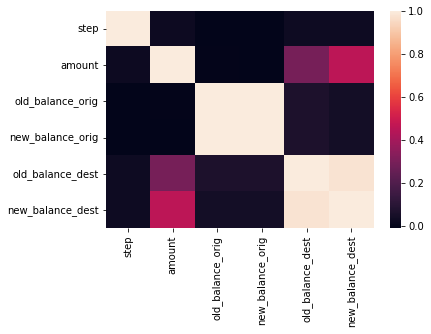

In [15]:
# Checking the correlation between the columns
sns.heatmap(payments.corr());

In [16]:
fraud = payments[payments['is_fraud'] == 'Fraud']
fraud

,step,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,Fraud,No
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,Fraud,No
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,Fraud,No
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,Fraud,No
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,Fraud,No
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,Fraud,No
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,Fraud,No
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,Fraud,No
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,Fraud,No


In [17]:
fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

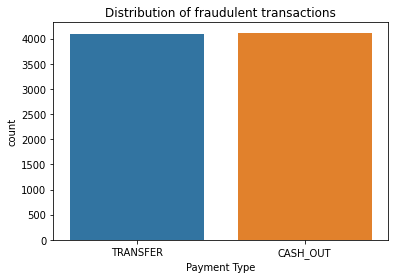

In [18]:
sns.countplot(data=fraud, x='type')
plt.xlabel('Payment Type')
plt.title('Distribution of fraudulent transactions');

# Model Building


In [19]:
# Mapping the categorical features to numerical
payments["type"] = payments["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [20]:
payments.head()

,step,type,amount,old_balance_orig,new_balance_orig,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,No
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,No
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,No
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,No
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,No


In [21]:
x = np.array(payments[['type','amount', 'old_balance_orig', 'new_balance_orig']])
y = np.array(payments['is_fraud'])

In [22]:
y.shape

(6362620,)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train.shape

(5090096, 4)

In [25]:
y_train.shape

(5090096,)

## Decision Tree Classifier

In [26]:
dt_model = DecisionTreeClassifier()

In [27]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

### Testing Accuracy

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
dt_pred = dt_model.predict(x_test)

In [30]:
print(confusion_matrix(y_test, dt_pred))

[[   1427     193]
 [    180 1270724]]


In [31]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       Fraud       0.89      0.88      0.88      1620
    No Fraud       1.00      1.00      1.00   1270904

    accuracy                           1.00   1272524
   macro avg       0.94      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [35]:
features = np.array([[4, 181.0, 181.0, 0]])
print(dt_model.predict(features))

['Fraud']
